In [55]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve

In [7]:
data = load_breast_cancer(as_frame=True)
df = data.frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [42]:
x = df.drop(columns="target")
y = df['target']

In [43]:
print(x, y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
logit = LogisticRegression(max_iter=1000)
logit.fit(x_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [45]:
print(df['target'].value_counts())

target
1    357
0    212
Name: count, dtype: int64


In [46]:
y_pred = logit.predict(x_test)

0.6422018348623854


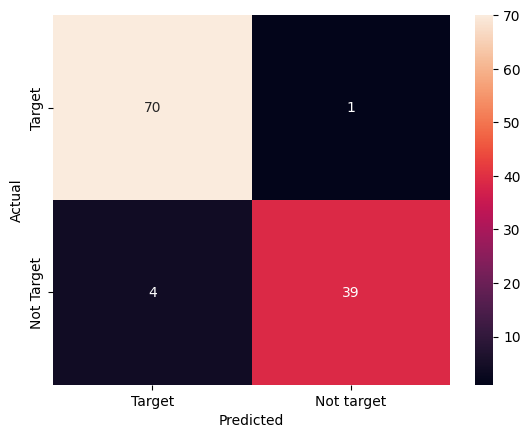

In [49]:
def draw_cm(actual, predicted):
  cm = confusion_matrix(actual, predicted, labels=[1, 0])
  tn, fp, fn, tp = cm.ravel()
  specificity = tn / (tn + tp)
  print(specificity)
  sn.heatmap(cm, annot=True, xticklabels=["Target", "Not target"], yticklabels=["Target", "Not Target"])
  plt.ylabel("Actual")
  plt.xlabel("Predicted")
  plt.show()

cm = draw_cm(y_test, y_pred)

In [48]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

0.956140350877193


In [51]:
proba = pd.DataFrame(logit.predict_proba(x_test))
proba.head()

,0,1
0,0.167823,8.321768e-01
1,1.000000,2.412152e-09
2,0.998110,1.890276e-03
3,0.002887,9.971130e-01
4,0.000561,9.994387e-01


In [52]:
test_res = pd.DataFrame({"actual": y_test})
test_res = test_res.reset_index()
test_res["chd1"] = proba.iloc[:, 1:2]
test_res.head()

,index,actual,chd1
0,204,1,8.321768e-01
1,70,0,2.412152e-09
2,131,0,1.890276e-03
3,431,1,9.971130e-01
4,540,1,9.994387e-01


In [54]:
auc_score = roc_auc_score(test_res.actual, test_res.chd1)
auc_score

np.float64(0.9977071732721913)